In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
from ipywidgets import interact
from IPython.display import display
import re
import urllib.request
from PIL import Image

# Data Exploration

## Importing Files

In [2]:
df_recipes = pd.read_csv('../data/recipes.csv')
#df_reviews = pd.read_csv('../data/reviews_train.csv')

## Recipes

In [3]:
df_recipes.columns

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


In [6]:
df_recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


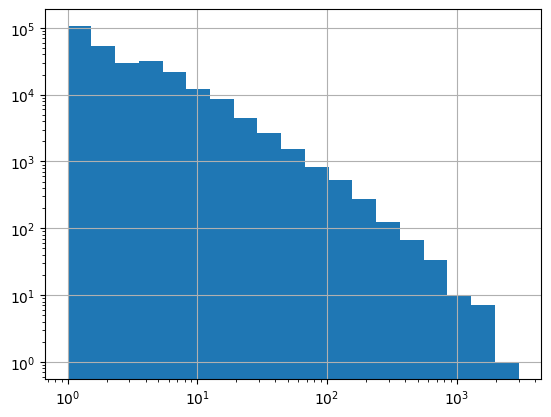

In [27]:
df_recipes['ReviewCount'].hist(bins=np.logspace(np.log10(1),np.log10(3000), 20))
plt.yscale('log')
plt.xscale('log')

In [3]:
df_recipes_2 = df_recipes.loc[df_recipes['ReviewCount']>5]
df_recipse_2 = df_recipes_2[[
 'RecipeId', 
 'Name', 
 'CookTime', 
 'DatePublished', 
 'Images', 
 'RecipeCategory',
 'Keywords',
 'RecipeIngredientQuantities',
 'RecipeIngredientParts',
 'AggregatedRating',
 'ReviewCount',
 'Calories'
]]
df_recipes_2.describe()

,Unnamed: 0,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,53339.000000,53339.00000,5.333900e+04,53338.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,53339.000000,33405.000000
mean,151722.112469,158920.55106,1.676255e+06,4.851204,18.667617,466.199244,23.217111,9.105023,83.790701,796.613354,47.783657,3.515754,20.802598,17.442290,8.221733
std,121796.698556,125489.61265,5.261286e+07,0.300421,43.722992,841.156027,60.861392,31.766257,229.611342,3270.485276,95.554441,14.218701,62.980043,33.432566,37.092870
min,2.000000,40.00000,2.700000e+01,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51050.500000,55171.50000,3.763600e+04,5.000000,7.000000,170.550000,5.600000,1.500000,5.100000,142.200000,12.300000,0.700000,2.200000,3.400000,4.000000
50%,118726.000000,124942.00000,9.229500e+04,5.000000,10.000000,304.100000,13.100000,4.600000,42.100000,381.100000,27.200000,1.900000,5.900000,9.000000,6.000000
75%,229911.000000,239512.50000,2.427290e+05,5.000000,16.000000,504.500000,25.750000,10.300000,105.800000,823.150000,48.900000,4.100000,16.600000,25.600000,8.000000
max,520411.000000,539115.00000,2.002285e+09,5.000000,3063.000000,90904.200000,9491.000000,5869.700000,37224.000000,226783.100000,5415.200000,3012.000000,2760.700000,3276.200000,3800.000000


Text(0, 0.5, 'number of recipes')

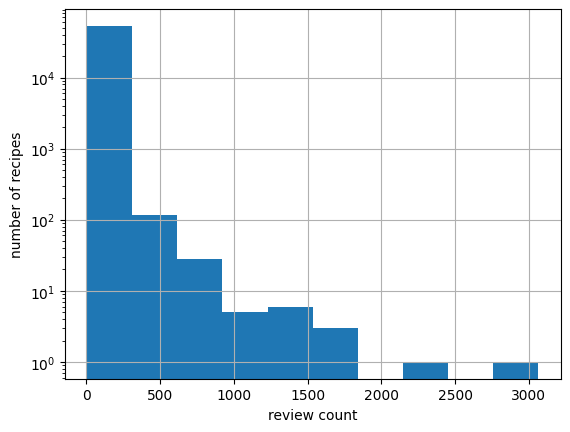

In [75]:
df_recipes_2['ReviewCount'].hist()
plt.yscale('log')
plt.xlabel('review count')
plt.ylabel('number of recipes')

In [3]:
def str2list(s: str) -> list:
    'returns a list of strings breaking the original string by "" '
    return re.findall(r'"(.*?)"', s)

s = df_recipes_2['Keywords'][0]
str2list(s)

NameError: name 'df_recipes_2' is not defined

In [20]:
df_recipes_2['RecipeCategory'].unique().shape

(252,)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'RecipeId'}>,
        <Axes: title={'center': 'AuthorId'}>,
        <Axes: title={'center': 'AggregatedRating'}>],
       [<Axes: title={'center': 'ReviewCount'}>,
        <Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'FatContent'}>,
        <Axes: title={'center': 'SaturatedFatContent'}>],
       [<Axes: title={'center': 'CholesterolContent'}>,
        <Axes: title={'center': 'SodiumContent'}>,
        <Axes: title={'center': 'CarbohydrateContent'}>,
        <Axes: title={'center': 'FiberContent'}>],
       [<Axes: title={'center': 'SugarContent'}>,
        <Axes: title={'center': 'ProteinContent'}>,
        <Axes: title={'center': 'RecipeServings'}>, <Axes: >]],
      dtype=object)

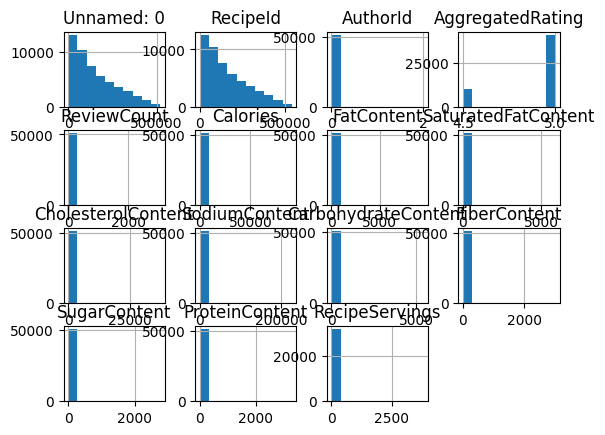

In [24]:
df_recipes_2[df_recipes_2['AggregatedRating']>=4].hist()

Showing images

In [ ]:

urllib.request.urlretrieve(url,'im.jpg')
  
img = Image.open("im.jpg")
img.show()

## Reviews

In [63]:
df_reviews

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
...,...,...,...,...,...,...,...,...
1401977,2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27T23:57:54Z,2020-12-27T23:57:54Z
1401978,2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28T00:44:42Z,2020-12-28T00:44:42Z
1401979,2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28T01:04:43Z,2020-12-28T01:04:43Z
1401980,2090345,411791,2002901938,Sue M.,5,Thank you so much for this amazing recipe! I l...,2020-12-28T03:07:10Z,2020-12-28T03:07:10Z


In [17]:
df_reviews.describe()

,ReviewId,RecipeId,AuthorId,Rating
count,1.401982e+06,1.401982e+06,1.401982e+06,1.401982e+06
mean,8.179739e+05,1.526412e+05,1.558638e+08,4.407951e+00
std,5.280821e+05,1.301112e+05,5.305111e+08,1.272012e+00
min,2.000000e+00,3.800000e+01,1.533000e+03,0.000000e+00
25%,3.743862e+05,4.703875e+04,1.336800e+05,4.000000e+00
50%,7.717805e+05,1.093270e+05,3.305450e+05,5.000000e+00
75%,1.204126e+06,2.318768e+05,8.183590e+05,5.000000e+00
max,2.090347e+06,5.412980e+05,2.002902e+09,5.000000e+00


### How many reviews each author has?

In [61]:
review_counts = df_reviews[['AuthorId', 'ReviewId']].groupby(['AuthorId']).count()
review_counts = review_counts[review_counts['ReviewId']>5]
review_counts.describe()

,ReviewId
count,23569.000000
mean,45.369638
std,176.649867
min,6.000000
25%,8.000000
50%,13.000000
75%,28.000000
max,8842.000000


Text(0, 0.5, 'number of authors')

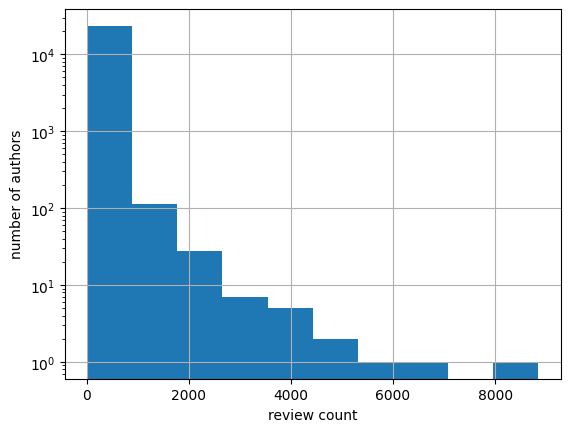

In [78]:
review_counts['ReviewId'].hist()
plt.yscale('log')
plt.xlabel('review count')
plt.ylabel('number of authors')

### How many authors rated each recipe?

Text(0, 0.5, 'number of recipes')

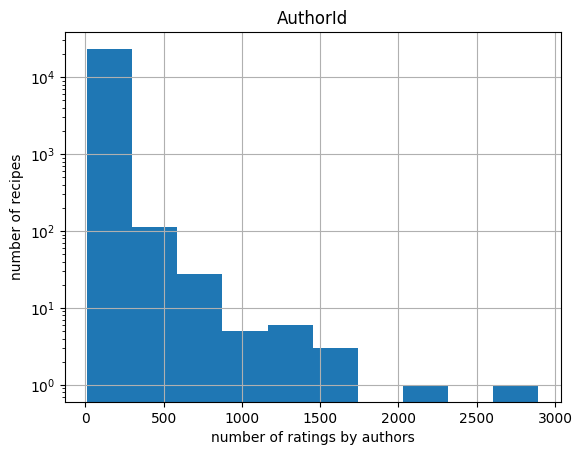

In [71]:
author_count = df_reviews[['AuthorId', 'RecipeId']].groupby(['RecipeId']).count()
author_count[author_count['AuthorId']>10].hist()
plt.yscale('log')
plt.xlabel('review count')
plt.ylabel('number of recipes')

In [55]:
reviews = df_reviews[['AuthorId', 'ReviewId', 'RecipeId', 'Rating', 'Review']]
review_counts = reviews.groupby('AuthorId').count()

In [29]:
def find_recipes(min_rev_count):
    selected_authors_df = review_counts.loc[review_counts['ReviewId']>=10]
    selected_authors = selected_authors_df.index.values
    selected_reviews = reviews.loc[reviews['AuthorId'].isin(selected_authors)]
    print('number of selected reviews:', selected_reviews['ReviewId'].nunique())
    print('number of selected reviewers:', selected_reviews['AuthorId'].nunique())
    print('number of selected recipes:', selected_reviews['RecipeId'].nunique())

    reviewer_count = selected_reviews[['AuthorId', 'RecipeId']].groupby(['RecipeId']).count()
    reviewer_count.hist(bins=np.logspace(np.log10(1),np.log10(3000), 20))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('review count')
    plt.ylabel('number of recipes')
    plt.title('review count histogram')

interact(find_recipes, min_rev_count=20)

interactive(children=(IntSlider(value=20, description='min_rev_count', max=60, min=-20), Output()), _dom_class…

<function __main__.find_recipes(min_rev_count)>

In [56]:
reviews[reviews['Rating']==0]

,AuthorId,ReviewId,RecipeId,Rating,Review
7,2156,21,148,0,Would someone please check the Nutrition Facts...
34,2848,73,2502,0,Unusual name for a recipe that has no pumpkin ...
47,3166,91,4165,0,I thought Chicken Cacciatore had peppers. If i...
56,3287,109,2505,0,Terrible directions. Doesn't say how to make t...
76,3504,138,4048,0,makes 2- 9inch pies or 1 deep dish pie
...,...,...,...,...,...
1401950,2002901044,2090309,49232,0,This isn’t quite the the Disney recipe. There ...
1401953,2002901101,2090312,349472,0,What a treat this is! A neighbour gave me 2 1/...
1401954,2002901084,2090313,101954,0,"I used maple syrup instead of corn syrup, well..."
1401962,2002901277,2090322,498981,0,I’ve been making theses for 5 years now. The o...


## Extracting image urls from dataframe

In [44]:

def find_url(s: str) -> str:
    'returns a valid url parsed from a string'
    return re.search(r'(http(s?):)([/|.|\w|\s|-])*\.(?:jpg|jpeg|gif|png)', s).group(0)


In [22]:
urls = pd.read_csv('../data/recipes.csv', usecols=['Images'], nrows=10).values.flatten()
list(map(find_url, urls))

['https://img.sndimg.com/food/image/upload/v1/img/feed/45809/AELeDrJmT1aPk0ADFr6d_10101046640053887.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/2886/xeKul9ZdTxKTXs3IGs16_20170323_193853.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/27208/rtdzvMzETmOyHx89FbaN_5AECF2F4-AE9E-4245-8948-FC9C7527C8DF.jpeg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/89204/eOEFikGTxil0TC3K3tGr_image.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/39087/WHnfAAGES8qMRC5hA4sw_IMG_20170417_052205224_HDR-7000x3937.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/35813/tDxRW7TeQsKEbvZ6MTjl_IMG_1468.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/67256/2jCcfG4AT667ziyZo924_20190421_174125.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/54257/xELVM3QvQuCK5oNcuAJ9_IMG_20170212_212029.jpg',
 'https://img.sndimg.com/food/image/upload/v1/img/feed/22782/RSS2jqMfQeu2FGvMkuyg_20170806_182816-01.jpeg',
 'https://img.sndimg.com/food

In [24]:
pd.read_csv('../data/recipes.csv', nrows=10)['ReviewCount']

0    3063.0
1    2273.0
2    1692.0
3    1657.0
4    1586.0
5    1410.0
6    1409.0
7    1384.0
8    1326.0
9    1284.0
Name: ReviewCount, dtype: float64

Draft

In [9]:
def find_url(s: str) -> str:
    'returns a valid url parsed from a string'
    return re.search(r'(http(s?):)([/|.|\w|\s|-])*\.(?:jpg|jpeg|gif|png)', s).group(0)

In [46]:
recipes = pd.read_csv('../data/recipes.csv', usecols=['RecipeId', 'Name', 'Images', 'AggregatedRating'], nrows=15)
#recipes['Images'] = list(map(find_url, recipes['Images']))
recipes

,RecipeId,Name,Images,AggregatedRating
0,45809,Bourbon Chicken,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
1,2886,Best Banana Bread,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
2,27208,To Die for Crock Pot Roast,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
3,89204,Crock-Pot Chicken With Black Beans &amp; Cream...,"c(""https://img.sndimg.com/food/image/upload/w_...",4.5
4,39087,Creamy Cajun Chicken Pasta,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
5,35813,Oatmeal Raisin Cookies,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
6,67256,Best Ever Banana Cake With Cream Cheese Frosting,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
7,54257,"Yes, Virginia There is a Great Meatloaf","c(""https://img.sndimg.com/food/image/upload/w_...",5.0
8,22782,Jo Mama's World Famous Spaghetti,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
9,32204,&quot;Whatever Floats Your Boat&quot; Brownies!,"c(""https://img.sndimg.com/food/image/upload/w_...",5.0
